#### Problem Statement: Make a Predictor model to identify Potential VOLT Customer.

In [442]:
# I have used mostly python programming, its packages and SQL for this data anlysis.
# first i have imported all the required python packages.

In [450]:
# Explained every points using comments

In [460]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
import plotly.express as px
import sqlite3
import sklearn.feature_selection as fs
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

In [443]:
import warnings # just to ignore the warnings that appeared while coding.
warnings.filterwarnings("ignore")

# Data View

In [444]:
sheet=pd.ExcelFile("Dataset & Data Dictionary - Omnicom & Rapp live online career challenge 2023.xlsx")
# ExcelFile() is the function which is used to import the data into pandas dataframe.
sheet.sheet_names # to see how many sheets are there in Excel file.

['Customer Data',
 'Priority Data',
 'Acorn Segmentation',
 'Volt Packages Availability',
 'Data Dictionary',
 'Guide',
 'Customer Data (V1)']

In [446]:
df_customer=sheet.parse("Customer Data") # parse() is used to see individual sheet of excel file into pandas dataframe
df_customer.head() # top 5 records

,CUSTOMER ID,Existing O2 Customer,Exisiting VM Customer,Exisiting Volt Customer,Acorn Segment,Length of O2 Contract (months),Length of Virgin Media contract,Time into O2 Contract (months),Time into VM Contract (months),Device,Phone Contract Type,Phone Data Package (GB),TV Included with Broadband?,Sky Cinema Packages,Held previous O2 Contract (O2 customers Only),Currently in arrears,Opted-Into marketing comms,Email Opt-in,SMS Opt-In
0,2624000013617,1,1,0,K,24,36,13,19,Samsung Galaxy Z Fold 3,PAYM,40GB,1,"Greats, Thriller, Hits",1,0,0,0,1
1,1222000029423,1,1,0,K,18,24,9,15,Samsung Galaxy Galaxy A53 5G,PAYM,20GB,1,"Greats, Thriller, Hits",1,0,0,0,1
2,2726000036500,0,1,0,K,0,18,0,17,0,0,0,1,"Premiere,Drama, Sci-fi Horror",0,0,0,0,1
3,2704000042284,0,1,0,K,0,24,0,2,0,0,0,0,0,0,0,0,0,1
4,8302000058292,1,0,0,K,18,0,4,0,OPPO Find X5 Pro 5G,PAYM,Unlimited GB,0,0,1,0,0,0,1


In [116]:
df_customer.shape # to check how many records and field in the customer table.
                  # we can clearly see there are 20k records and 19 fields.

(20000, 19)

In [117]:
df_customer.dtypes # dtypes is used to see the data types of each field or each column in the dataframe.

CUSTOMER ID                                       int64
Existing O2 Customer                              int64
Exisiting VM Customer                             int64
Exisiting Volt Customer                           int64
Acorn Segment                                    object
Length of O2 Contract (months)                    int64
Length of Virgin Media contract                   int64
Time into O2 Contract (months)                    int64
Time into VM Contract (months)                    int64
Device                                           object
Phone Contract Type                              object
Phone Data Package (GB)                          object
TV Included with Broadband?                       int64
Sky Cinema Packages                              object
Held previous O2 Contract (O2 customers Only)     int64
Currently in arrears                              int64
Opted-Into marketing comms                        int64
Email Opt-in                                    

In [118]:
df_customer.dtypes.value_counts() # value_count is the function the are used to count unique values.
                                  # here we have seen there are 14 number of fields that are integer types
                                  # and 5 fields are object data types.

int64     14
object     5
dtype: int64

In [454]:
df_customer.info() # info() is used to get all information about the dataframe such as number of columns with name
                   # data types, number of records in each field and if the column have null values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 19 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   CUSTOMER ID                                    20000 non-null  int64 
 1   Existing O2 Customer                           20000 non-null  int64 
 2   Exisiting VM Customer                          20000 non-null  int64 
 3   Exisiting Volt Customer                        20000 non-null  int64 
 4   Acorn Segment                                  20000 non-null  object
 5   Length of O2 Contract (months)                 20000 non-null  int64 
 6   Length of Virgin Media contract                20000 non-null  int64 
 7   Time into O2 Contract (months)                 20000 non-null  int64 
 8   Time into VM Contract (months)                 20000 non-null  int64 
 9   Device                                         20000 non-null

In [120]:
# Similarly for another sheet i.e for Priority Data.

In [121]:
df_priority=sheet.parse("Priority Data")
df_priority.sample(5)

,CUSTOMER ID,Phone Contract Type,Priority Member,Has used Family Prezzo offer,Has used Student All Bar One offer,Has used Free Gym day pass offer,Has used Student Odeon offer,Has used Family Odeon offer,Has used Greggs free weekly coffee offer,Has used PUMA 60% off offer,Has used Amazon Prime offer,Has used AppleTV+ offer,Has used Disney+ offer,Has used O2 Pre Sale ticket offer
2254,7331064406326,0,1,0,0,0,0,1,1,0,0,0,1,0
6472,8713142921883,PAYM,1,0,0,0,0,0,0,0,0,0,1,0
2878,4196014674878,0,1,0,1,0,1,0,1,1,0,1,1,1
2184,6855143948989,0,1,1,0,0,0,1,0,0,1,1,0,1
3594,6345066478149,PAYM,1,0,0,0,0,0,1,0,0,0,0,0


In [122]:
df_priority.shape # There are 6619 records and 14 fields in the priority data table

(6619, 14)

In [451]:
df_priority.dtypes.value_counts() # value_counts() function is used to count each value in the columns.

int64     13
object     1
dtype: int64

In [453]:
df_priority.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6619 entries, 0 to 6618
Data columns (total 14 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   CUSTOMER ID                               6619 non-null   int64 
 1   Phone Contract Type                       6619 non-null   object
 2   Priority Member                           6619 non-null   int64 
 3   Has used Family Prezzo offer              6619 non-null   int64 
 4   Has used Student All Bar One offer        6619 non-null   int64 
 5   Has used Free Gym day pass offer          6619 non-null   int64 
 6   Has used Student Odeon offer              6619 non-null   int64 
 7   Has used Family Odeon offer               6619 non-null   int64 
 8   Has used Greggs free weekly coffee offer  6619 non-null   int64 
 9   Has used PUMA 60% off offer               6619 non-null   int64 
 10  Has used Amazon Prime offer               6619 n

# Data Wrangling

In [125]:
df_customer.isnull().sum() # isnull() function checks in the dataframe if there is any null values in any
                           # of the fields however sum() used to sumup all the null values in a field.
                           # below are the list of fields that shows corresponding the numbers of null value.
                           # From following information, there are no null values present in whole dataset.

CUSTOMER ID                                      0
Existing O2 Customer                             0
Exisiting VM Customer                            0
Exisiting Volt Customer                          0
Acorn Segment                                    0
Length of O2 Contract (months)                   0
Length of Virgin Media contract                  0
Time into O2 Contract (months)                   0
Time into VM Contract (months)                   0
Device                                           0
Phone Contract Type                              0
Phone Data Package (GB)                          0
TV Included with Broadband?                      0
Sky Cinema Packages                              0
Held previous O2 Contract (O2 customers Only)    0
Currently in arrears                             0
Opted-Into marketing comms                       0
Email Opt-in                                     0
SMS Opt-In                                       0
dtype: int64

In [126]:
#similarly for the priority dataframe

In [127]:
df_priority.isnull().sum()

CUSTOMER ID                                 0
Phone Contract Type                         0
Priority Member                             0
Has used Family Prezzo offer                0
Has used Student All Bar One offer          0
Has used Free Gym day pass offer            0
Has used Student Odeon offer                0
Has used Family Odeon offer                 0
Has used Greggs free weekly coffee offer    0
Has used PUMA 60% off offer                 0
Has used Amazon Prime offer                 0
Has used AppleTV+ offer                     0
Has used Disney+ offer                      0
Has used O2 Pre Sale ticket offer           0
dtype: int64

In [128]:
#Both the dataframes are cleaned to use for analysis

# Exploratory Data Analysis (EDA)

## use of SQLite

In [ ]:
# here i used sqlite to access the data and visualise easily.

In [464]:
con=sqlite3.connect('database.db') # connect to the database if there is no .db file then it will create a file.
wb=pd.ExcelFile('Dataset & Data Dictionary - Omnicom & Rapp live online career challenge 2023.xlsx')
for sheet in wb.sheet_names:
        df=pd.read_excel('Dataset & Data Dictionary - Omnicom & Rapp live online career challenge 2023.xlsx',sheet_name=sheet)
        df.to_sql(sheet,con, index=False,if_exists="replace")
con.commit()
# to_sql() is to convert the excel file into sql datebase.

In [130]:
pd.read_sql("select * from sqlite_master where type='table'", con)

,type,name,tbl_name,rootpage,sql
0,table,Customer Data,Customer Data,2,"CREATE TABLE ""Customer Data"" (\n""CUSTOMER ID"" ..."
1,table,Priority Data,Priority Data,265,"CREATE TABLE ""Priority Data"" (\n""CUSTOMER ID"" ..."
2,table,Acorn Segmentation,Acorn Segmentation,313,"CREATE TABLE ""Acorn Segmentation"" (\n""Unnamed:..."
3,table,Volt Packages Availability,Volt Packages Availability,314,"CREATE TABLE ""Volt Packages Availability"" (\n""..."
4,table,Data Dictionary,Data Dictionary,315,"CREATE TABLE ""Data Dictionary"" (\n""Unnamed: 0""..."
5,table,Guide,Guide,318,"CREATE TABLE ""Guide"" (\n""How To:"" TEXT,\n ""Un..."
6,table,Customer Data (V1),Customer Data (V1),319,"CREATE TABLE ""Customer Data (V1)"" (\n""CUSTOMER..."


<AxesSubplot:ylabel='Device'>

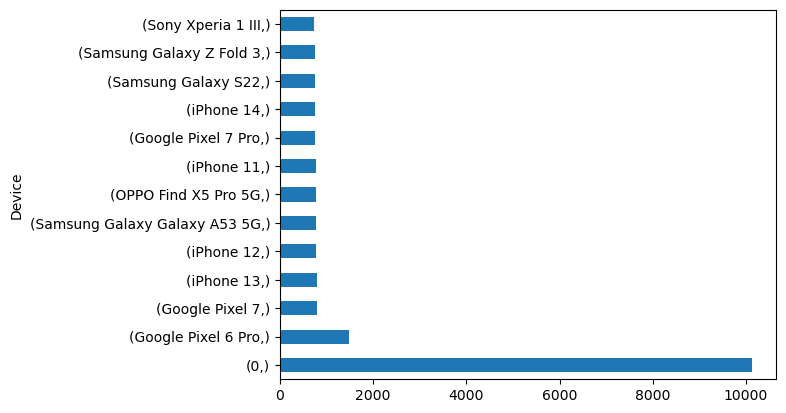

In [131]:
pd.read_sql("select Device from 'Customer Data'", con).value_counts().plot(kind="barh")

In [155]:
px.histogram(df_customer, x='Device', color="Device")

In [190]:
# from the above bar graph, the device that most number of customer(around 10.13k) uses are acquired unknown handset
# however
# the number of customers who took through contracts Google Pixel 6 pro are 1480. 754, 786, 771, 763 number
# of customers 
# acquired iPhone 14, iPhone 13, iPhone 12, iPhone 11 respectively through contract.

In [132]:
pd.read_sql("select * from 'Customer Data'", con)

,CUSTOMER ID,Existing O2 Customer,Exisiting VM Customer,Exisiting Volt Customer,Acorn Segment,Length of O2 Contract (months),Length of Virgin Media contract,Time into O2 Contract (months),Time into VM Contract (months),Device,Phone Contract Type,Phone Data Package (GB),TV Included with Broadband?,Sky Cinema Packages,Held previous O2 Contract (O2 customers Only),Currently in arrears,Opted-Into marketing comms,Email Opt-in,SMS Opt-In
0,2624000013617,1,1,0,K,24,36,13,19,Samsung Galaxy Z Fold 3,PAYM,40GB,1,"Greats, Thriller, Hits",1,0,0,0,1
1,1222000029423,1,1,0,K,18,24,9,15,Samsung Galaxy Galaxy A53 5G,PAYM,20GB,1,"Greats, Thriller, Hits",1,0,0,0,1
2,2726000036500,0,1,0,K,0,18,0,17,0,0,0,1,"Premiere,Drama, Sci-fi Horror",0,0,0,0,1
3,2704000042284,0,1,0,K,0,24,0,2,0,0,0,0,0,0,0,0,0,1
4,8302000058292,1,0,0,K,18,0,4,0,OPPO Find X5 Pro 5G,PAYM,Unlimited GB,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,5614199968406,0,1,0,K,0,36,0,2,0,0,0,0,0,0,0,0,1,0
19996,6098199977832,0,1,0,K,0,24,0,8,0,0,0,0,0,0,0,0,1,0
19997,3287199984636,1,0,0,K,18,0,10,0,Samsung Galaxy S22,PAYM,5GB,0,0,1,0,0,1,1
19998,7803199997893,1,1,0,K,36,36,22,30,Samsung Galaxy Galaxy A53 5G,PAYM,5GB,0,0,0,0,0,1,1


In [169]:
pd.read_sql("""select sum(`Existing O2 Customer`) as `O2 Customers`, sum(`Exisiting VM Customer`)
            as `VM Customers`, sum(`Exisiting Volt Customer`) as `VOLT Customers`
            from 'Customer Data'""", con)

,O2 Customers,VM Customers,VOLT Customers
0,9864,15206,1368


In [170]:
# The number of O2 customers which are currently using o2 products are 9864,
# number of VM customers which are currently using VM products are 15206,
# and number of Volt customers which are currently using VOLT products are 1368.
# Therefore most of the customers are using Virgin Media(VM) products.

### Common Customers of O2 and Virgin Media(VM)

In [177]:
pd.read_sql("""select sum(`Existing O2 Customer`) as `Common Customers of O2 and VM`
               from `Customer Data`
               where `Existing O2 Customer`=1 and `Exisiting VM Customer`=1""", con)

,Common Customers of O2 and VM
0,5070


In [178]:
#There are 5070 number of customers who are using both O2 and Virgin media products.

### Common Customers of O2 and VOLT

In [179]:
pd.read_sql("""select sum(`Existing O2 Customer`) as `Common Customers of O2 and VM`
               from `Customer Data`
               where `Existing O2 Customer`=1 and `Exisiting Volt Customer`=1""", con)

,Common Customers of O2 and VM
0,1368


In [181]:
#There are total 1368 VOLT customers and all the customers are using O2 as well.

### Common Customers of Virgin Media and VOLT

In [183]:
pd.read_sql("""select sum(`Exisiting VM Customer`) as `Common Customers of VM and VOLT`
               from `Customer Data`
               where `Exisiting VM Customer`=1 and `Exisiting Volt Customer`=1""", con)

,Common Customers of VM and VOLT
0,1368


In [184]:
#There are total 1368 VOLT customers and all the customers are using Virgin media as well.

### Common Customers of O2, Virgin Media and VOLT

In [188]:
pd.read_sql("""select sum(`Existing O2 Customer`) as `Common Customers of O2, VM and VOLT`
               from `Customer Data`
               where `Exisiting VM Customer`=1 and `Exisiting Volt Customer`=1
               and `Existing O2 Customer`=1""", con)

,"Common Customers of O2, VM and VOLT"
0,1368


In [189]:
# From the above, it can conclude that all the VOLT customers uses O2 products as well as Virgin Media Products.

### Chosen Packages

In [196]:
pd.read_sql("""select `Acorn Segment` from
             `Customer Data`""", con).value_counts()

Acorn Segment
K                8400
M                4440
G                1900
C                1720
O                1640
I                1100
B                 800
dtype: int64

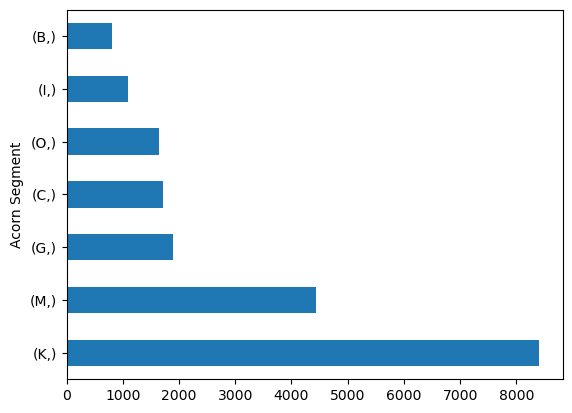

In [198]:
pd.read_sql("""select `Acorn Segment` from
             `Customer Data`""", con).value_counts().plot(kind="barh");

In [231]:
px.histogram(df_customer, x="Acorn Segment",color="Acorn Segment")

In [265]:
# From the above table and bar graph, maximum number of customers that uses packages are
# K package(Student Life package). While
# M, G, C, O, I and B packages are using 4440, 1900, 1720, 1640, 1100 and 800 number of customers respectively.

### VOLT Customers use Packages

In [209]:
voltp=pd.read_sql("""select `Acorn Segment` from `Customer Data` where `Exisiting Volt Customer`=1""", con).value_counts()
voltp

Acorn Segment
K                590
M                305
G                120
C                116
O                109
I                 65
B                 63
dtype: int64

In [252]:
names=["K", "M", "G", "C", "O", "I", "B"]
px.pie(values=voltp.values, names=names)

In [266]:
# from the above table and pie chart, mostly VOLT customers(43.1% or 590 customers) acquiring K packages
# (Student Life package) while
# M, G, C, O, I, B have 22.3%, 8.77%, 8.48%, 7.97%, 4.75% and 4.61% percentage of VOLT customers respectively.
# Therefore, K packages(Student package) are more popular amongst VOLT customer. VOLT customers are mostly Students.

# Join Customer Data and Priority Data

In [285]:
cp=pd.read_sql("""select * from `Customer Data` inner join `Priority Data`
               on `Customer Data`.`CUSTOMER ID`=`Priority Data`.`CUSTOMER ID`""", con)
cp.columns

Index(['CUSTOMER ID', 'Existing O2 Customer', 'Exisiting VM Customer',
       'Exisiting Volt Customer', 'Acorn Segment',
       'Length of O2 Contract (months)', 'Length of Virgin Media contract',
       'Time into O2 Contract (months)', 'Time into VM Contract (months)',
       'Device', 'Phone Contract Type', 'Phone Data Package (GB)',
       'TV Included with Broadband?', 'Sky Cinema Packages',
       'Held previous O2 Contract (O2 customers Only)', 'Currently in arrears',
       'Opted-Into marketing comms', 'Email Opt-in', 'SMS Opt-In',
       'CUSTOMER ID', 'Phone Contract Type', 'Priority Member',
       'Has used Family Prezzo offer', 'Has used Student All Bar One offer',
       'Has used Free Gym day pass offer', 'Has used Student Odeon offer',
       'Has used Family Odeon offer',
       'Has used Greggs free weekly coffee offer',
       'Has used PUMA 60% off offer', 'Has used Amazon Prime offer',
       'Has used AppleTV+ offer', 'Has used Disney+ offer',
       'Has used O

### Offers that has been used by Customers

In [278]:
pd.read_sql("""select `Priority Data`.`Phone Contract Type` from `Customer Data` inner join `Priority Data`
               on `Customer Data`.`CUSTOMER ID`=`Priority Data`.`CUSTOMER ID`""", con).value_counts()

Phone Contract Type
0                      3369
PAYM                   1968
SIMO                    938
PAYG                    344
dtype: int64

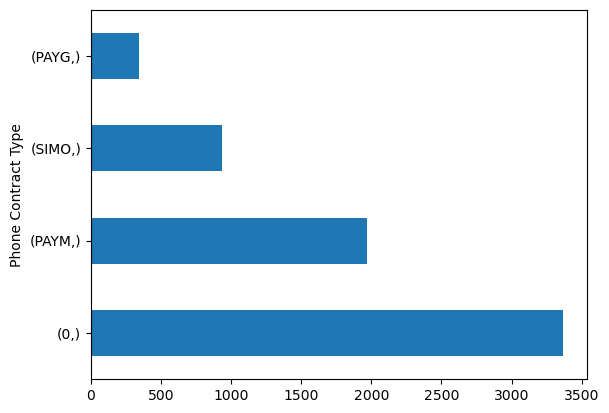

In [294]:
pd.read_sql("""select `Priority Data`.`Phone Contract Type` from `Customer Data` inner join `Priority Data`
               on `Customer Data`.`CUSTOMER ID`=`Priority Data`.`CUSTOMER ID`""", con).value_counts().plot(kind="barh");

In [281]:
# from the above table and bar graph, 3369 customers have taken unknown contract type phone, 1968 number of customers
# have taken Pay as monthly contract, 938 are SIM only contract and 344 are PAY AS YOU GO contract.

### VOLT Customers uses Phone Contract

In [291]:
pd.read_sql("""select `Priority Data`.`Phone Contract Type` from `Customer Data` inner join `Priority Data`
               on `Customer Data`.`CUSTOMER ID`=`Priority Data`.`CUSTOMER ID` 
               where `Customer Data`.`Exisiting Volt Customer`=1""", con).value_counts()

Phone Contract Type
PAYM                   284
SIMO                   121
PAYG                    53
dtype: int64

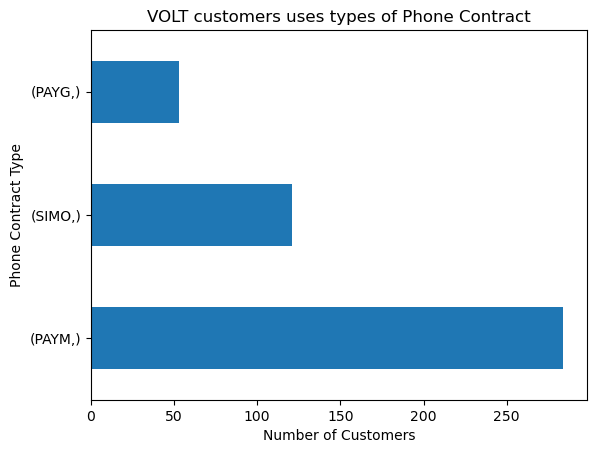

In [297]:
pd.read_sql("""select `Priority Data`.`Phone Contract Type` from `Customer Data` inner join `Priority Data`
               on `Customer Data`.`CUSTOMER ID`=`Priority Data`.`CUSTOMER ID` 
               where `Customer Data`.`Exisiting Volt Customer`=1""", con).value_counts().plot(kind="barh");
plt.xlabel("Number of Customers");
plt.title("VOLT customers uses types of Phone Contract");

In [ ]:
#284 out of total VOLT existing customers uses phone on contract as PAY MONTHLY, 121 are SIM ONLY CONTRACT,
#53 are PAY AS YOU GO CONTRACT while rest of them do not use their phone on CONTRACT.

In [286]:
pd.read_sql("""select `Priority Data`.`Priority Member` from `Customer Data` inner join `Priority Data`
               on `Customer Data`.`CUSTOMER ID`=`Priority Data`.`CUSTOMER ID`""", con).value_counts()

Priority Member
1                  6619
dtype: int64

In [ ]:
# All the 6619 members are in priority.

In [287]:
pd.read_sql("""select `Priority Data`.`Has used Family Prezzo offer` from `Customer Data` inner join `Priority Data`
               on `Customer Data`.`CUSTOMER ID`=`Priority Data`.`CUSTOMER ID`""", con).value_counts()

Has used Family Prezzo offer
0                               5641
1                                978
dtype: int64

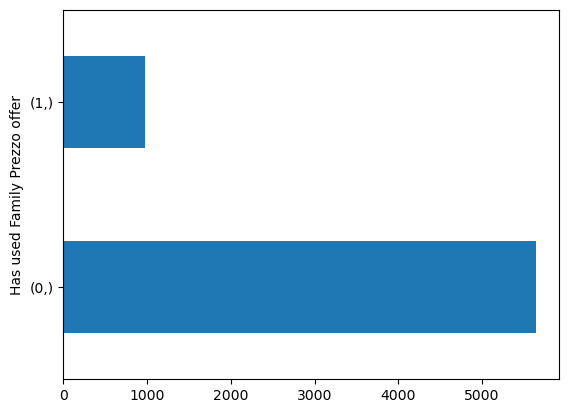

In [318]:
pd.read_sql("""select `Priority Data`.`Has used Family Prezzo offer` from `Customer Data` inner join `Priority Data`
               on `Customer Data`.`CUSTOMER ID`=`Priority Data`.`CUSTOMER ID`""", con).value_counts().plot(kind="barh");

In [ ]:
# there are only 978 priority customers that has used family prezzo offer while 5641 did not.

### VOLT Customers uses Offers

In [298]:
pd.read_sql("""select `Priority Data`.`Has used Family Prezzo offer` from `Customer Data` inner join `Priority Data`
               on `Customer Data`.`CUSTOMER ID`=`Priority Data`.`CUSTOMER ID`
               where `Customer Data`.`Exisiting Volt Customer`=1""", con).value_counts()

Has used Family Prezzo offer
0                               392
1                                66
dtype: int64

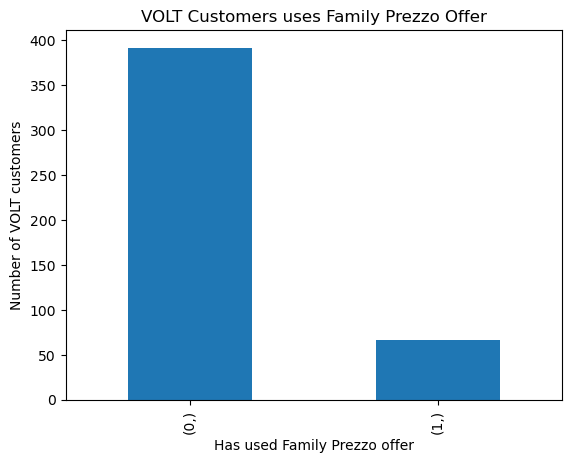

In [316]:
pd.read_sql("""select `Priority Data`.`Has used Family Prezzo offer` from `Customer Data` inner join `Priority Data`
               on `Customer Data`.`CUSTOMER ID`=`Priority Data`.`CUSTOMER ID`
               where `Customer Data`.`Exisiting Volt Customer`=1""", con).value_counts().plot(kind="bar")
plt.ylabel("Number of VOLT customers")
plt.title("VOLT Customers uses Family Prezzo Offer");

In [306]:
#there are only 66 VOLT customers who have used Family Prezzo offer.

In [309]:
pd.read_sql("""select `Priority Data`.`Has used Free Gym day pass offer` from `Customer Data` inner join `Priority Data`
               on `Customer Data`.`CUSTOMER ID`=`Priority Data`.`CUSTOMER ID`
               where `Customer Data`.`Exisiting Volt Customer`=1""", con).value_counts()

Has used Free Gym day pass offer
0                                   311
1                                   147
dtype: int64

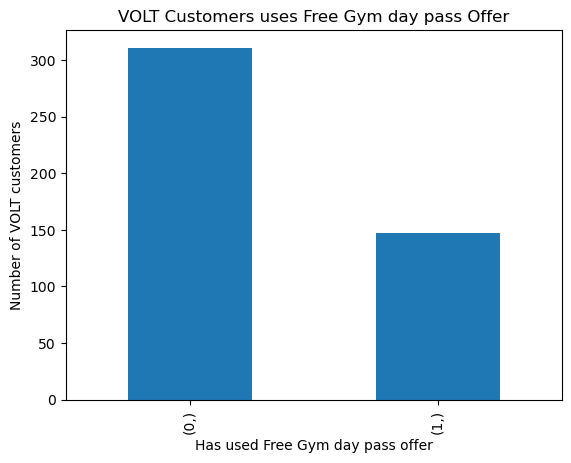

In [315]:
pd.read_sql("""select `Priority Data`.`Has used Free Gym day pass offer` from `Customer Data` inner join `Priority Data`
               on `Customer Data`.`CUSTOMER ID`=`Priority Data`.`CUSTOMER ID`
               where `Customer Data`.`Exisiting Volt Customer`=1""", con).value_counts().plot(kind="bar")
plt.ylabel("Number of VOLT customers")
plt.title("VOLT Customers uses Free Gym day pass Offer");

In [ ]:
# Only 147 VOLT customers have used Free gym offer.

In [311]:
pd.read_sql("""select `Priority Data`.`Has used Amazon Prime offer` from `Customer Data` inner join `Priority Data`
               on `Customer Data`.`CUSTOMER ID`=`Priority Data`.`CUSTOMER ID`
               where `Customer Data`.`Exisiting Volt Customer`=1""", con).value_counts()

Has used Amazon Prime offer
0                              320
1                              138
dtype: int64

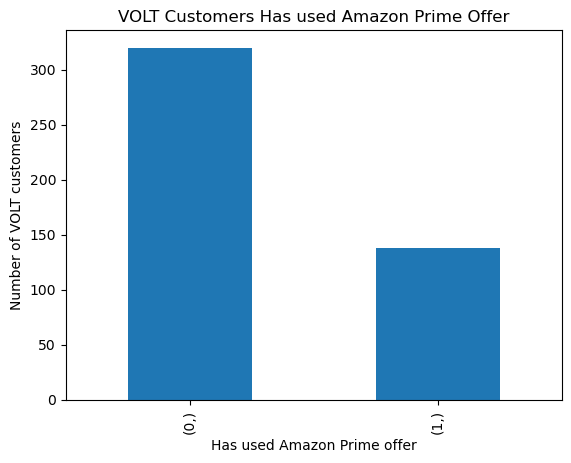

In [319]:
pd.read_sql("""select `Priority Data`.`Has used Amazon Prime offer` from `Customer Data` inner join `Priority Data`
               on `Customer Data`.`CUSTOMER ID`=`Priority Data`.`CUSTOMER ID`
               where `Customer Data`.`Exisiting Volt Customer`=1""", con).value_counts().plot(kind="bar")
plt.ylabel("Number of VOLT customers")
plt.title("VOLT Customers Has used Amazon Prime Offer");

In [313]:
# Only 138 VOLT customers have used Free gym offer while rest of then did not.

# Feature Engineering

# Preprocessing

In [447]:
# preprocessing is done to structure or format dataset for the machine learning model.

In [322]:
df_customer

,CUSTOMER ID,Existing O2 Customer,Exisiting VM Customer,Exisiting Volt Customer,Acorn Segment,Length of O2 Contract (months),Length of Virgin Media contract,Time into O2 Contract (months),Time into VM Contract (months),Device,Phone Contract Type,Phone Data Package (GB),TV Included with Broadband?,Sky Cinema Packages,Held previous O2 Contract (O2 customers Only),Currently in arrears,Opted-Into marketing comms,Email Opt-in,SMS Opt-In
0,2624000013617,1,1,0,K,24,36,13,19,Samsung Galaxy Z Fold 3,PAYM,40GB,1,"Greats, Thriller, Hits",1,0,0,0,1
1,1222000029423,1,1,0,K,18,24,9,15,Samsung Galaxy Galaxy A53 5G,PAYM,20GB,1,"Greats, Thriller, Hits",1,0,0,0,1
2,2726000036500,0,1,0,K,0,18,0,17,0,0,0,1,"Premiere,Drama, Sci-fi Horror",0,0,0,0,1
3,2704000042284,0,1,0,K,0,24,0,2,0,0,0,0,0,0,0,0,0,1
4,8302000058292,1,0,0,K,18,0,4,0,OPPO Find X5 Pro 5G,PAYM,Unlimited GB,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,5614199968406,0,1,0,K,0,36,0,2,0,0,0,0,0,0,0,0,1,0
19996,6098199977832,0,1,0,K,0,24,0,8,0,0,0,0,0,0,0,0,1,0
19997,3287199984636,1,0,0,K,18,0,10,0,Samsung Galaxy S22,PAYM,5GB,0,0,1,0,0,1,1
19998,7803199997893,1,1,0,K,36,36,22,30,Samsung Galaxy Galaxy A53 5G,PAYM,5GB,0,0,0,0,0,1,1


## One Hot Encoding

In [449]:
# I am using one hot-encoding method to convert string into dummies value(0 and 1) so that the data coud be
# good fit for the model with minimum overfitting and underfitting.
# There are features such as ['Acorn Segment'], ['Device'], ["Phone Contract Type"], ["Phone Data Package (GB)"]
# and ["Sky Cinema Packages"] have string data and needs to convert into numeric because machine learning model
# works good on numerical data.
# In the following i have used get_dummies() function to convert column to numeric.

In [455]:
dum_df = pd.get_dummies(df_customer['Acorn Segment']) # get_dummies() will convert categorical into dummies (0 and 1).

In [456]:
dum_df.head()

,B,C,G,I,K,M,O
0,0,0,0,0,1,0,0
1,0,0,0,0,1,0,0
2,0,0,0,0,1,0,0
3,0,0,0,0,1,0,0
4,0,0,0,0,1,0,0


In [327]:
df_customer=pd.concat([df_customer,dum_df],axis='columns')

In [330]:
df_customer=df_customer.drop("Acorn Segment", axis=1)

In [331]:
df_customer.head()

,CUSTOMER ID,Existing O2 Customer,Exisiting VM Customer,Exisiting Volt Customer,Length of O2 Contract (months),Length of Virgin Media contract,Time into O2 Contract (months),Time into VM Contract (months),Device,Phone Contract Type,...,Opted-Into marketing comms,Email Opt-in,SMS Opt-In,B,C,G,I,K,M,O
0,2624000013617,1,1,0,24,36,13,19,Samsung Galaxy Z Fold 3,PAYM,...,0,0,1,0,0,0,0,1,0,0
1,1222000029423,1,1,0,18,24,9,15,Samsung Galaxy Galaxy A53 5G,PAYM,...,0,0,1,0,0,0,0,1,0,0
2,2726000036500,0,1,0,0,18,0,17,0,0,...,0,0,1,0,0,0,0,1,0,0
3,2704000042284,0,1,0,0,24,0,2,0,0,...,0,0,1,0,0,0,0,1,0,0
4,8302000058292,1,0,0,18,0,4,0,OPPO Find X5 Pro 5G,PAYM,...,0,0,1,0,0,0,0,1,0,0


In [333]:
dum_device = pd.get_dummies(df_customer['Device'])
dum_device.head()

,0,Google Pixel 6 Pro,Google Pixel 7,Google Pixel 7 Pro,OPPO Find X5 Pro 5G,Samsung Galaxy Galaxy A53 5G,Samsung Galaxy S22,Samsung Galaxy Z Fold 3,Sony Xperia 1 III,iPhone 11,iPhone 12,iPhone 13,iPhone 14
0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0


In [334]:
df_customer=pd.concat([df_customer, dum_device], axis='columns')

In [337]:
df_customer=df_customer.drop("Device", axis=1)
df_customer.head()

,CUSTOMER ID,Existing O2 Customer,Exisiting VM Customer,Exisiting Volt Customer,Length of O2 Contract (months),Length of Virgin Media contract,Time into O2 Contract (months),Time into VM Contract (months),Phone Contract Type,Phone Data Package (GB),...,Google Pixel 7 Pro,OPPO Find X5 Pro 5G,Samsung Galaxy Galaxy A53 5G,Samsung Galaxy S22,Samsung Galaxy Z Fold 3,Sony Xperia 1 III,iPhone 11,iPhone 12,iPhone 13,iPhone 14
0,2624000013617,1,1,0,24,36,13,19,PAYM,40GB,...,0,0,0,0,1,0,0,0,0,0
1,1222000029423,1,1,0,18,24,9,15,PAYM,20GB,...,0,0,1,0,0,0,0,0,0,0
2,2726000036500,0,1,0,0,18,0,17,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2704000042284,0,1,0,0,24,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8302000058292,1,0,0,18,0,4,0,PAYM,Unlimited GB,...,0,1,0,0,0,0,0,0,0,0


In [340]:
dum_contract=pd.get_dummies(df_customer["Phone Contract Type"])
dum_contract.head()

,0,PAYG,PAYM,SIMO
0,0,0,1,0
1,0,0,1,0
2,1,0,0,0
3,1,0,0,0
4,0,0,1,0


In [341]:
df_customer=pd.concat([df_customer, dum_contract], axis='columns')
df_customer.head()

,CUSTOMER ID,Existing O2 Customer,Exisiting VM Customer,Exisiting Volt Customer,Length of O2 Contract (months),Length of Virgin Media contract,Time into O2 Contract (months),Time into VM Contract (months),Phone Contract Type,Phone Data Package (GB),...,Samsung Galaxy Z Fold 3,Sony Xperia 1 III,iPhone 11,iPhone 12,iPhone 13,iPhone 14,0,PAYG,PAYM,SIMO
0,2624000013617,1,1,0,24,36,13,19,PAYM,40GB,...,1,0,0,0,0,0,0,0,1,0
1,1222000029423,1,1,0,18,24,9,15,PAYM,20GB,...,0,0,0,0,0,0,0,0,1,0
2,2726000036500,0,1,0,0,18,0,17,0,0,...,0,0,0,0,0,0,1,0,0,0
3,2704000042284,0,1,0,0,24,0,2,0,0,...,0,0,0,0,0,0,1,0,0,0
4,8302000058292,1,0,0,18,0,4,0,PAYM,Unlimited GB,...,0,0,0,0,0,0,0,0,1,0


In [342]:
df_customer.drop("Phone Contract Type", axis=1, inplace=True)

In [343]:
df_customer.head()

,CUSTOMER ID,Existing O2 Customer,Exisiting VM Customer,Exisiting Volt Customer,Length of O2 Contract (months),Length of Virgin Media contract,Time into O2 Contract (months),Time into VM Contract (months),Phone Data Package (GB),TV Included with Broadband?,...,Samsung Galaxy Z Fold 3,Sony Xperia 1 III,iPhone 11,iPhone 12,iPhone 13,iPhone 14,0,PAYG,PAYM,SIMO
0,2624000013617,1,1,0,24,36,13,19,40GB,1,...,1,0,0,0,0,0,0,0,1,0
1,1222000029423,1,1,0,18,24,9,15,20GB,1,...,0,0,0,0,0,0,0,0,1,0
2,2726000036500,0,1,0,0,18,0,17,0,1,...,0,0,0,0,0,0,1,0,0,0
3,2704000042284,0,1,0,0,24,0,2,0,0,...,0,0,0,0,0,0,1,0,0,0
4,8302000058292,1,0,0,18,0,4,0,Unlimited GB,0,...,0,0,0,0,0,0,0,0,1,0


In [345]:
dum_datapackage=pd.get_dummies(df_customer["Phone Data Package (GB)"])
dum_datapackage.head()

,0,10GB,20GB,40GB,5GB,Unlimited GB
0,0,0,0,1,0,0
1,0,0,1,0,0,0
2,1,0,0,0,0,0
3,1,0,0,0,0,0
4,0,0,0,0,0,1


In [346]:
df_customer=pd.concat([df_customer, dum_datapackage], axis='columns')
df_customer.head()

,CUSTOMER ID,Existing O2 Customer,Exisiting VM Customer,Exisiting Volt Customer,Length of O2 Contract (months),Length of Virgin Media contract,Time into O2 Contract (months),Time into VM Contract (months),Phone Data Package (GB),TV Included with Broadband?,...,0,PAYG,PAYM,SIMO,0,10GB,20GB,40GB,5GB,Unlimited GB
0,2624000013617,1,1,0,24,36,13,19,40GB,1,...,0,0,1,0,0,0,0,1,0,0
1,1222000029423,1,1,0,18,24,9,15,20GB,1,...,0,0,1,0,0,0,1,0,0,0
2,2726000036500,0,1,0,0,18,0,17,0,1,...,1,0,0,0,1,0,0,0,0,0
3,2704000042284,0,1,0,0,24,0,2,0,0,...,1,0,0,0,1,0,0,0,0,0
4,8302000058292,1,0,0,18,0,4,0,Unlimited GB,0,...,0,0,1,0,0,0,0,0,0,1


In [347]:
df_customer.drop("Phone Data Package (GB)", axis=1, inplace=True)
df_customer.head()

,CUSTOMER ID,Existing O2 Customer,Exisiting VM Customer,Exisiting Volt Customer,Length of O2 Contract (months),Length of Virgin Media contract,Time into O2 Contract (months),Time into VM Contract (months),TV Included with Broadband?,Sky Cinema Packages,...,0,PAYG,PAYM,SIMO,0,10GB,20GB,40GB,5GB,Unlimited GB
0,2624000013617,1,1,0,24,36,13,19,1,"Greats, Thriller, Hits",...,0,0,1,0,0,0,0,1,0,0
1,1222000029423,1,1,0,18,24,9,15,1,"Greats, Thriller, Hits",...,0,0,1,0,0,0,1,0,0,0
2,2726000036500,0,1,0,0,18,0,17,1,"Premiere,Drama, Sci-fi Horror",...,1,0,0,0,1,0,0,0,0,0
3,2704000042284,0,1,0,0,24,0,2,0,0,...,1,0,0,0,1,0,0,0,0,0
4,8302000058292,1,0,0,18,0,4,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [348]:
dum_cinemapackage=pd.get_dummies(df_customer["Sky Cinema Packages"])
dum_cinemapackage.head()

,0,"Comedy, Disney, Action, Family","Greats, Thriller, Hits","Premiere,Drama, Sci-fi Horror"
0,0,0,1,0
1,0,0,1,0
2,0,0,0,1
3,1,0,0,0
4,1,0,0,0


In [349]:
df_customers=pd.concat([df_customer, dum_cinemapackage], axis='columns')
df_customers.head()

,CUSTOMER ID,Existing O2 Customer,Exisiting VM Customer,Exisiting Volt Customer,Length of O2 Contract (months),Length of Virgin Media contract,Time into O2 Contract (months),Time into VM Contract (months),TV Included with Broadband?,Sky Cinema Packages,...,0,10GB,20GB,40GB,5GB,Unlimited GB,0,"Comedy, Disney, Action, Family","Greats, Thriller, Hits","Premiere,Drama, Sci-fi Horror"
0,2624000013617,1,1,0,24,36,13,19,1,"Greats, Thriller, Hits",...,0,0,0,1,0,0,0,0,1,0
1,1222000029423,1,1,0,18,24,9,15,1,"Greats, Thriller, Hits",...,0,0,1,0,0,0,0,0,1,0
2,2726000036500,0,1,0,0,18,0,17,1,"Premiere,Drama, Sci-fi Horror",...,1,0,0,0,0,0,0,0,0,1
3,2704000042284,0,1,0,0,24,0,2,0,0,...,1,0,0,0,0,0,1,0,0,0
4,8302000058292,1,0,0,18,0,4,0,0,0,...,0,0,0,0,0,1,1,0,0,0


In [350]:
df_customer.drop("Sky Cinema Packages", axis=1, inplace=True)
df_customer.head()

,CUSTOMER ID,Existing O2 Customer,Exisiting VM Customer,Exisiting Volt Customer,Length of O2 Contract (months),Length of Virgin Media contract,Time into O2 Contract (months),Time into VM Contract (months),TV Included with Broadband?,Held previous O2 Contract (O2 customers Only),...,0,PAYG,PAYM,SIMO,0,10GB,20GB,40GB,5GB,Unlimited GB
0,2624000013617,1,1,0,24,36,13,19,1,1,...,0,0,1,0,0,0,0,1,0,0
1,1222000029423,1,1,0,18,24,9,15,1,1,...,0,0,1,0,0,0,1,0,0,0
2,2726000036500,0,1,0,0,18,0,17,1,0,...,1,0,0,0,1,0,0,0,0,0
3,2704000042284,0,1,0,0,24,0,2,0,0,...,1,0,0,0,1,0,0,0,0,0
4,8302000058292,1,0,0,18,0,4,0,0,1,...,0,0,1,0,0,0,0,0,0,1


In [354]:
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 44 columns):
 #   Column                                         Non-Null Count  Dtype
---  ------                                         --------------  -----
 0   CUSTOMER ID                                    20000 non-null  int64
 1   Existing O2 Customer                           20000 non-null  int64
 2   Exisiting VM Customer                          20000 non-null  int64
 3   Exisiting Volt Customer                        20000 non-null  int64
 4   Length of O2 Contract (months)                 20000 non-null  int64
 5   Length of Virgin Media contract                20000 non-null  int64
 6   Time into O2 Contract (months)                 20000 non-null  int64
 7   Time into VM Contract (months)                 20000 non-null  int64
 8   TV Included with Broadband?                    20000 non-null  int64
 9   Held previous O2 Contract (O2 customers Only)  20000 non-null  int64
 10

In [375]:
# Now we can see all the features are numeric. so it will now easy to apply machine learning model.
# but before we need to delete the customer ID because nouse of this column in model. And then lets decide
# the dependent variable and independent variable.

In [376]:
# As my main goal is to make a predictor model that predict which customer is more likely to become a VOLT customer.
# therefore Column name "Existing Volt Customer" will be Dependent Variable and rest of them will be independent
# variable.

In [378]:
# Dependent variable have output as 1 or 0. 1 denotes potential VOLT customer and 0 denote not potential
# VOLT customer.

# Best Feature Selection

In [370]:
df_customer.drop("CUSTOMER ID", axis=1, inplace=True)

In [371]:
top_features=fs.SelectKBest(score_func=fs.chi2, k=10)
v=df_customer["Exisiting Volt Customer"]          
U=df_customer.drop(["Exisiting Volt Customer"], axis=1)
mod1=top_features.fit(U,v)

In [372]:
result_df=pd.DataFrame(mod1.scores_)
columns_df=pd.DataFrame(U.columns)
c_all=pd.concat([columns_df, result_df], axis=1)
c_all.columns=["Best_Features", "Chi2-score"]
top_best_features=c_all.sort_values("Chi2-score", ascending=False)

In [373]:
top_best_features.reset_index(drop=True)
top_best_features.index=np.arange(1, len(top_best_features)+1)
top_best_features.head(50)

,Best_Features,Chi2-score
1,Length of O2 Contract (months),20696.604832
2,Time into O2 Contract (months),10496.036851
3,Email Opt-in,9454.015237
4,Opted-Into marketing comms,4208.361660
5,Length of Virgin Media contract,2661.917263
6,Time into VM Contract (months),1069.556921
7,Existing O2 Customer,764.727595
8,0,744.206097
9,0,744.206097
10,0,568.136898


In [374]:
#Above are the top best features that will be most effective for the machine learning model. top 10 features from
# bottom can be deleted from dataframe and that will not affect much on machine learning model.

In [380]:
# "Length of O2 Contract (months)" is the most effective feature for the model while "M" is the least effective.

# Train-Test Split

In [383]:
U_train, U_test, v_train, v_test = train_test_split(U, v, test_size = 0.3, random_state=37)
print(U_test.shape)
print(U_train.shape)

(6000, 42)
(14000, 42)


In [384]:
# I have splited data into two parts which is test(30%) and train(70%) data.

# SVM Model

In [463]:
# SVM classifiers is a supervised machine learning model which is used for classification as well as regression.
# But here i am using for classification because the problem is classification problem.
# SVM offers great accuracy in high dimentional space and It takes very less memory.

In [389]:
model_svm=LinearSVC(max_iter=1000)
model_svm=CalibratedClassifierCV(model_svm)
clf=model_svm.fit(U_train,v_train)

In [390]:
y_predict=clf.predict(U_test)
print([y_predict])

[array([0, 0, 0, ..., 0, 0, 0])]


In [393]:
print("SVM model Accuracy: {}%".format(round(accuracy_score(v_test, y_predict)*100, 2)))

SVM model Accuracy: 99.4%


In [394]:
print(classification_report(v_test,y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5575
           1       0.96      0.95      0.96       425

    accuracy                           0.99      6000
   macro avg       0.98      0.98      0.98      6000
weighted avg       0.99      0.99      0.99      6000



In [395]:
cm = confusion_matrix(v_test,y_predict)
cm

array([[5559,   16],
       [  20,  405]])

#### Explanation

In [397]:
# True Positive means Model correctly predicts the positive class.
# False Positive means Model incorrectly predicts the positive class which is also known as type 1 error.
# False Negative means Model incorrectly predicts the negative class which is also known as type 2 error.
# True Negative means Model correctly predicts the negative class
#Here
# True positive are 5559, it means 5559 number of outputs are predicted correctly by SVM model.
# False Positive are 16,
# False Negative are 20,
# True Negative are 405

In [398]:
df_y_predict=pd.DataFrame(y_predict, columns=["Predicted Values"])
v1=[v_test]
v2=pd.DataFrame(v_test)
v2=v2.reset_index(drop=True)
f123=[v2, df_y_predict]

In [436]:
Comparision_df=pd.concat(f123, axis=1)
Comparision_df.sample(30)

,Exisiting Volt Customer,Predicted Values
2368,0,0
246,0,0
2410,0,0
5933,0,0
4931,0,0
3614,0,0
5505,0,0
4978,0,0
5236,0,0
3194,0,0


In [461]:
# Existing Volt Customer is the column which have 0 or 1. 1 denotes potential VOLT customer and 0 denotes not potential
# Volt customer.
# here we can see the test data output and predicted data output where it can be clearly seen
# that SVM model is almost accurate (99.4%) except on index number 3352 where actual output was 1 but SVM model
# is predicted as 0